In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# need to add nltk imports up here
# link: https://www.nltk.org/
import nltk
nltk.download('punkt')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Import data

In [ ]:
event_user_page = pd.read_csv('/content/drive/Shareddrives/Sterling Woods Data Challenge/Data set/event_user_page.csv')

In [ ]:
event_user_page.shape

(1356836, 46)

In [ ]:
event_user_page = pd.read_csv('/content/drive/Shareddrives/Sterling Woods Data Challenge/Data set/event_user_page.csv')
user_content = pd.DataFrame(event_user_page.groupby(['distinct_id'])['properties'].apply(','.join).reset_index())

In [ ]:
user_content

,Unnamed: 0,id,Content,content
0,0,000028db-5119-4edd-a73c-b2441e626c65,"{""action"": ""impression"", ""cta_type"": ""optin"", ...",action impression cta_type optin view_type sli...
1,1,0000336c-fa7f-463f-8080-8d59288c3ae5,"{},{},{""action"": ""impression"", ""cta_type"": ""op...",action impression cta_type optin view_type sli...
2,2,000037df-a0f8-4fab-971b-155b548cac9e,"{""action"": ""impression"", ""cta_type"": ""optin"", ...",action impression cta_type optin view_type sli...
3,3,0000d24c-e8af-4de2-8792-ad2269315785,"{""action"": ""impression"", ""cta_type"": ""optin"", ...",action impression cta_type optin view_type sli...
4,4,00011087-656b-4e66-bfd5-1a6725b27c5c,"{""action"": ""impression"", ""cta_type"": ""optin"", ...",action impression cta_type optin view_type sli...
...,...,...,...,...
281196,293839,fffeaa26-ce52-469a-ae27-d9679d2a4130,"{""action"": ""impression"", ""cta_type"": ""optin"", ...",action impression cta_type optin view_type sli...
281197,293841,ffff33f7-0e6c-4119-a3fc-7c54dd32196a,"{""action"": ""impression"", ""cta_type"": ""yesno"", ...",action impression cta_type yesno view_type pop...
281198,293842,ffff53ac-5d34-436c-8baa-8f931dab1dcc,"{""action"": ""impression"", ""cta_type"": ""optin"", ...",action impression cta_type optin view_type sli...
281199,293843,ffff6d60-7ba1-4b22-8b23-70130b506ec5,"{""title"": ""The Alchemist: Focal Banger clone"",...",title the alchemist focal banger clone author ...


In [ ]:
#user_content['properties'].nunique()

In [ ]:
# delete NA
#user_content=user_content[user_content['properties']!='{}']

In [ ]:
# rename titles
# user_content.columns=['id','Content']

# Text processing

## Lowercase
There is no difference between the words "HELLO", "Hello" and "hello"...
To make our analysis more meaningful, we make all of these words lowercase.

In [ ]:
# make everything lowercase
user_content['content'] = user_content['Content'].str.lower()
user_content.head()

,Unnamed: 0,id,Content,content
0,0,000028db-5119-4edd-a73c-b2441e626c65,"{""action"": ""impression"", ""cta_type"": ""optin"", ...","{""action"": ""impression"", ""cta_type"": ""optin"", ..."
1,1,0000336c-fa7f-463f-8080-8d59288c3ae5,"{},{},{""action"": ""impression"", ""cta_type"": ""op...","{},{},{""action"": ""impression"", ""cta_type"": ""op..."
2,2,000037df-a0f8-4fab-971b-155b548cac9e,"{""action"": ""impression"", ""cta_type"": ""optin"", ...","{""action"": ""impression"", ""cta_type"": ""optin"", ..."
3,3,0000d24c-e8af-4de2-8792-ad2269315785,"{""action"": ""impression"", ""cta_type"": ""optin"", ...","{""action"": ""impression"", ""cta_type"": ""optin"", ..."
4,4,00011087-656b-4e66-bfd5-1a6725b27c5c,"{""action"": ""impression"", ""cta_type"": ""optin"", ...","{""action"": ""impression"", ""cta_type"": ""optin"", ..."


## Strip funky characters (!,~-@$% etc)
Ditch the special characters in the content column

In [ ]:
# remove any funky characters with a blank
user_content['content'] = user_content['content'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
user_content

In [ ]:
# let's see what we did, no commas or periods!
print(user_content['content'][0])
print(user_content['content'][1])

In [ ]:
# save this user_content for directly use it later
# user_content.to_csv('/content/drive/Shareddrives/Sterling Woods Data Challenge/Data set/user_content.csv') 

# reload it 
user_content=pd.read_csv('/content/drive/Shareddrives/Sterling Woods Data Challenge/Data set/user_content.csv')

## Deleting dupliate content (if any)

In [ ]:
pd.options.display.max_colwidth = 1000

In [ ]:
user_content[['Content','content']][15:20]

,Content,content
15,"{""action"": ""impression"", ""cta_type"": ""yesno"", ""view_type"": ""floating"", ""campaign_id"": ""pe0dok1n1ag953lsf43o""},{""action"": ""impression"", ""cta_type"": ""optin"", ""view_type"": ""slide"", ""campaign_id"": ""rhergrh7suqn7xzbk4lb""}",action impression cta_type yesno view_type floating campaign_id pedoknaglsfoaction impression cta_type optin view_type slide campaign_id rhergrhsuqnxzbklb
16,"{""action"": ""impression"", ""cta_type"": ""yesno"", ""view_type"": ""popup"", ""campaign_id"": ""qewkv3gfnmsu8qmpqfs4""}",action impression cta_type yesno view_type popup campaign_id qewkvgfnmsuqmpqfs
17,"{""action"": ""impression"", ""cta_type"": ""yesno"", ""view_type"": ""floating"", ""campaign_id"": ""pe0dok1n1ag953lsf43o""}",action impression cta_type yesno view_type floating campaign_id pedoknaglsfo
18,"{""action"": ""impression"", ""cta_type"": ""optin"", ""view_type"": ""slide"", ""campaign_id"": ""rhergrh7suqn7xzbk4lb""}",action impression cta_type optin view_type slide campaign_id rhergrhsuqnxzbklb
19,"{""action"": ""impression"", ""cta_type"": ""optin"", ""view_type"": ""popup"", ""campaign_id"": ""vow11ql7iqudgpccv6bb""},{""action"": ""impression"", ""cta_type"": ""optin"", ""view_type"": ""slide"", ""campaign_id"": ""rhergrh7suqn7xzbk4lb""}",action impression cta_type optin view_type popup campaign_id vowqliqudgpccvbbaction impression cta_type optin view_type slide campaign_id rhergrhsuqnxzbklb


In [ ]:
# rename the coloumn and dataframe, keep the original complete
data = pd.DataFrame(user_content['content'])
data.columns=['headline_text']

In [ ]:
# check the shape
data.shape

(281201, 1)

In [ ]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text')

,headline_text
122060,action conversion cta_type optin view_type popup campaign_id qalnotkwxtgwrfgxcoupon product_id product_price product_title digital membership days free trialaction impression cta_type optin view_type popup campaign_id qalnotkwxtgwrfgxcoupon product_id product_price product_title digital membership days free trial
267580,action conversion cta_type optin view_type popup campaign_id qalnotkwxtgwrfgxcoupon product_id product_price product_title digital membership days free trialaction impression cta_type optin view_type popup campaign_id qalnotkwxtgwrfgxcoupon product_id product_price product_title digital membership days free trial
83994,action conversion cta_type optin view_type popup campaign_id vowqliqudgpccvbbaction impression cta_type optin view_type popup campaign_id vowqliqudgpccvbb
98045,action conversion cta_type optin view_type popup campaign_id vowqliqudgpccvbbaction impression cta_type optin view_type popup campaign_id vowqliqudgpccvbb
196860,action conversion cta_type optin view_type popup campaign_id xfijlixftomjkfaaction impression cta_type optin view_type popup campaign_id xfijlixftomjkfa
...,...
280444,NaN
280446,NaN
280530,NaN
280830,NaN


In [ ]:
# delete where the texts are empty
data = data.dropna()

In [ ]:
# check the shape again, see we delete how many rows with missing values
data.shape

(278081, 1)

## Text EDA on the Content

### Most common words
Word clouds and frequency tables/plots.

In [ ]:
# The most common words in the Content? note that we are doing this before tokenizer
# myTable = data['headline_text'].str.split(expand=True).stack().value_counts()
# myTable[0:20]

### Stop words

In [ ]:
invaluable_words

['logged_in',
 'author',
 'content_type',
 'post_name',
 'false',
 'view_type',
 'cta_type',
 'campaign_id',
 'impression',
 'action',
 'restricted',
 'article',
 'optin',
 'slide',
 'rhergrhsuqnxzbklb',
 'ipa',
 'quad',
 'pagetitle',
 'true',
 'yesno',
 'floating',
 'recipe',
 'pedoknaglsfo',
 'brewing',
 'clone',
 'popup',
 'byo',
 'term',
 'staff',
 'ale',
 'xlkywcdkrjjhlgkp',
 'tips',
 'pros',
 'project',
 'url',
 'trueterm',
 'articletitle',
 'build',
 'recipetitle',
 'cos',
 'product_id',
 'product_price',
 'product_title',
 'projects',
 'techniques',
 'company',
 'id',
 'new',
 'pierce',
 'days',
 'great',
 'name',
 'making',
 'total',
 'order',
 'mark',
 'using',
 'quantity',
 'price',
 'understanding',
 'make',
 'j',
 'dr',
 'science',
 'guide',
 'bottle',
 'trueurl',
 'conversion',
 'resource',
 'ph',
 'chart',
 'style',
 'system',
 'method',
 'tom',
 'styles',
 'payment',
 'shipping',
 'big',
 'extra',
 'million',
 'steps',
 'double',
 'step',
 'easy',
 'use',
 'better',
 'o

In [ ]:
# stop words, delete the words we are not using for cluster
# English stop words + customerized
invaluable_words =['logged_in','author', 'content_type', 'post_name', 'false', 'view_type','cta_type', 'campaign_id', 
            'impression', 'action', 'restricted','article', 'optin', 'slide', 'rhergrhsuqnxzbklb', 'ipa','quad','pagetitle',
            'true', 'yesno','floating', 'recipe', 'pedoknaglsfo', 'brewing', 'clone', 'popup','byo', 
            'term', 'staff', 'ale', 'xlkywcdkrjjhlgkp','tips','pros','project','url','trueterm','articletitle',
            'build', 'recipetitle', 'cos', 'product_id','product_price','product_title','projects', 'techniques',
            'company', 'id', 'new', 'pierce', 'days', 'great', 'name', 'making','total','order','mark', 'using', 
            'quantity', 'price', 'understanding', 'make','j', 'dr', 'science','guide', 'bottle', 'trueurl', 
            'conversion','resource', 'ph', 'chart', 'style','system', 'method', 'tom','styles', 'payment', 'shipping', 
            'big','extra', 'million', 'steps','double','step','easy','use','better','original','back','profile','day','title',
            'add', 'vs','co', 'good','calculating','common', 'explained','ways','best','perfect', 'specialty', 'special', 'pro','create',
            'url', 'projecttitle','swdkjejxynrf', 'dxxxbkmfbgrtnwau','falseurl', 'swdkjejxynrf', 'falseaction', 'zilabqvspqezuzhof',
            'card', 'code', 'digital', 'free', 'trialorder', 'membership', 'coupon','trueaction', 'trialaction', 'trialcoupon', 'byoblackfriday', 
            'falsecoupon', 'truecoupon', 'daysorder', 'true order', 'trial', 'falseorder', 'trialterm','membership', 'digital', 'trialaction', 'trial', 
            'coupon', 'trialcoupon', 'falsecoupon', 'trialurl', 'trialterm', 'express', 'paypal', 'trialorder', 'trueaction', 'falseterm', 'credit',
            'product', 'sku', 'print', 'subscription', 'digital', 'magazine', 'membership', 'combo',
            'plus', 'edition', 'code', 'paypal', 'express', 'coupon', 'book', 'trueaction','online', 'package','articleaction',
            'truetitle','digital', 'coupon', 'falsecoupon', 'trialcoupon', 'membershipterm', 'membershipurl', 'trueaction', 'express', 'falseterm',
            'trueaction', 'falseterm', 'articleaction']

stop_words = text.ENGLISH_STOP_WORDS.union(invaluable_words)

In [ ]:
# remove the stop words
print(data.head()) # note how the stop words have been removed
data['headline_text'] = data['headline_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) 
data['headline_text'] = data['headline_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) <15])) 

# compare with the one with out removing stop_words
print(data.head())

                                                                                                                                                                                               headline_text
0                                                                                                                             action impression cta_type optin view_type slide campaign_id rhergrhsuqnxzbklb
1  action impression cta_type optin view_type slide campaign_id rhergrhsuqnxzbklbterm diabetes logged_in trueterm beers for diabetics logged_in trueterm diabetes logged_in trueterm diabetes logged_in true
2                                                                                                                             action impression cta_type optin view_type slide campaign_id rhergrhsuqnxzbklb
3                                                                                                                             action impression cta_type optin view_type slide campa

In [ ]:
# after remove the invaluable words, we can see 247045 rows are blank
# which means in those 247045 users didn't give the effective information, so we delete them
# and focus on the intepretable users
data[data['headline_text']=='']

,headline_text
0,
2,
3,
4,
5,
...,...
281195,
281196,
281197,
281198,


In [ ]:
# check the blank again
print(data.shape)
data = data[data['headline_text']!='']
print(data.shape)
# keep 31035 valuable users!

(278081, 1)
(24128, 1)


In [ ]:
data[:5]

,headline_text
1,diabetes beers diabetics diabetes diabetes
28,joseph schlitz schlitz gusto circa s chris colby theschizlitz recipeaction
29,yeast conditioning thomas miller yeast conditioning thomas miller dry hopping aroma garetz dry hopping aroma garetz
31,old ales terry foster oldales old mikoli weaver articleterm old old old ales terry foster oldales
41,growing hops containers


### Word Cloud
Use word cloud to see the most frequent words

<Figure size 3600x3600 with 0 Axes>

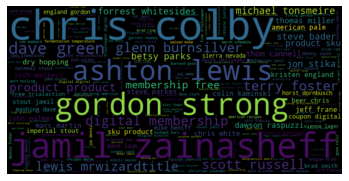

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image

# lower max_font_size
plt.figure(figsize=(50,50))
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['headline_text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# TF-IDF - Prepare for KMeans
TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

* TF(w) = (Number of times term w appears in a document) / (Total number of terms in the document)
* IDF(w) = log_e(Total number of documents / Number of documents with term w in it)
*TF-IDF (term frequency, inverse document frequency) is the product of these two quantities

In [ ]:
desc = data['headline_text'].values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()

In [ ]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[2000:2500])

10896
['cidermaking', 'ciderr', 'cidre', 'cidrenormande', 'ciel', 'cigar', 'cinammon', 'cinamon', 'cinco', 'cinderlands', 'cinimon', 'cinnamom', 'cinnamon', 'cinnanom', 'cinnnamon', 'cinq', 'cinque', 'cintra', 'cip', 'circa', 'circle', 'circulation', 'citra', 'citralush', 'citramosaic', 'citric', 'citron', 'citrudelic', 'citrus', 'city', 'civil', 'ckear', 'clad', 'clam', 'clamp', 'clarificacion', 'clarification', 'clarify', 'clarifying', 'clarity', 'clark', 'clarks', 'claryfiction', 'class', 'classic', 'classicclones', 'claussenii', 'claw', 'clayton', 'clean', 'cleaner', 'cleaners', 'cleaning', 'cleaninplace', 'clear', 'clearing', 'clearwater', 'clermont', 'clhorofenol', 'clifford', 'cliffs', 'clill', 'climate', 'climates', 'cline', 'clinton', 'clne', 'cloe', 'clog', 'clogging', 'clon', 'clone', 'clonekk', 'clones', 'clonesdarkside', 'cloning', 'clorhide', 'close', 'closed', 'closet', 'cloud', 'cloudiness', 'clouds', 'cloudwater', 'cloudwaterr', 'cloudy', 'clove', 'cloves', 'clown', 'c

## Elbow Method

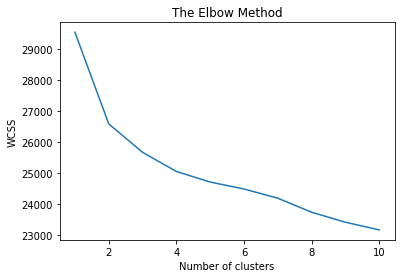

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.savefig('/content/drive/Shareddrives/Sterling Woods Data Challenge/Data set/elbow.png')

<Figure size 432x288 with 0 Axes>

## 6 clusters

In [ ]:
kmeans6 = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans6.fit(X)
# We look at 6 the clusters generated by k-means.
common_words = kmeans6.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : beer, porter, lager, yeast, saison, american, pale, brew, dry, hopping, malt, hop, stripe, fermentation, cider, neipa, belgian, water, red, pilsner, brown, recipes, john, wort, temperature
1 : stout, imperial, oatmeal, milk, russian, does, chocolate, body, galante, stephen, clones, burnsilver, glenn, irish, josh, weikert, sweet, breakfast, dry, coffee, porter, american, jamil, zainasheff, founders
2 : chris, colby, dave, green, ashton, lewis, beer, mrwizardtitle, gordon, strong, american, hopping, mashing, pale, dry, water, lager, fermentation, white, yeast, michael, zainasheff, jamil, fruit, steve
3 : gordon, england, strong, american, pale, strongs, neipa, zainasheff, jamil, belgian, lager, dave, chris, dark, green, colby, recipeaction, hopping, raspuzzi, dawson, pilsner, beer, brown, stout, munich
4 : jamil, zainasheff, belgian, american, hefeweizen, german, witbier, klsch, irish, red, chris, wheat, bitter, strong, stout, gordon, colby, pale, blond, blonde, bohemian, pilsener, c

In [ ]:
# count users in each cluster
clusterCount6 = pd.DataFrame(pd.Series(kmeans6.labels_).value_counts()) #count values
clusterCount6.columns=['Cluster Counts']
clusterCount6

,Cluster Counts
0,15629
2,4506
4,1563
1,941
3,907
5,582


In [ ]:
data['cluster6'] = kmeans6.labels_
user_cluster6 = pd.merge(user_content,data,left_index=True,right_index=True,how='right')[['id','cluster6']]
#rfm = rfmSegmentation[['End Customer Name','cluster']]
user_cluster6.head()

,id,cluster6
1,0000336c-fa7f-463f-8080-8d59288c3ae5,0
28,00069dd9-daf1-422d-8719-7290a9d733be,2
29,0006a15a-268a-4133-b883-58f7e2e70105,0
31,0006ce57-eaf5-4b4c-a657-6243ac54728d,0
41,0008ee03-4a8b-47b9-a4ae-26aa18a2c925,0


## 8 clusters

In [ ]:
kmeans8 = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans8.fit(X)
# We look at 6 the clusters generated by k-means.
common_words = kmeans8.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : saison, heniff, mike, zainasheff, jamil, chris, larsimont, jeanchristophe, strong, colby, gordon, belgian, saving, american, savingsaison, stout, dark, yeast, brett, articleterm, dave, tonsmeire, michael, green, farmhouse
1 : beer, lager, yeast, brew, malt, stripe, cider, neipa, hop, belgian, red, pale, pilsner, water, john, brown, wort, mash, keg, gose, amber, wheat, vienna, carbonation, rye
2 : stout, imperial, oatmeal, milk, russian, does, galante, body, chocolate, stephen, clones, glenn, burnsilver, irish, josh, weikert, sweet, breakfast, dry, coffee, porter, american, jamil, zainasheff, founders
3 : dave, green, american, porter, lewis, ashton, gordon, mrwizardtitle, strong, pale, recipes, beer, fermentation, water, awardwinning, lager, chris, michael, derek, dellinger, temperature, scott, mashing, colby, yeast
4 : stripe, allgrain, hazy, porter, trueorder, old, red, trialquantity, wine, magreader, water, england, november, december, oak, nano, whirlpool, dubbel, janish, sessi

In [ ]:
# count users in each cluster
clusterCount8 = pd.DataFrame(pd.Series(kmeans8.labels_).value_counts()) #count values
clusterCount8.columns=['Cluster Counts']
clusterCount8

,Cluster Counts
7,14450
2,6471
4,2355
1,2146
6,1867
5,1602
3,1508
0,636


In [ ]:
data['cluster8'] = kmeans8.labels_
user_cluster8 = pd.merge(user_content,data,left_index=True,right_index=True,how='right')[['id','cluster8']]
#rfm = rfmSegmentation[['End Customer Name','cluster']]
user_cluster8.head()

,id,cluster8
1,0000336c-fa7f-463f-8080-8d59288c3ae5,7
28,00069dd9-daf1-422d-8719-7290a9d733be,7
29,0006a15a-268a-4133-b883-58f7e2e70105,7
31,0006ce57-eaf5-4b4c-a657-6243ac54728d,7
38,0008313b-2de1-4803-ac7b-bccf1eae7813,4


# LDA

## Create the Document-Word matrix

In [ ]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                 
                             token_pattern='[a-zA-Z0-9]{3,}')
data_vectorized = vectorizer.fit_transform(desc)

In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=6,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1)           
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


### Dominant topic

In [ ]:
# column names
topicnames = ['Topic' + str(i) for i in range(lda_model.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.080000,0.580000,0.080000,0.080000,0.080000,0.080000,1
Doc1,0.020000,0.020000,0.020000,0.720000,0.220000,0.020000,3
Doc2,0.010000,0.010000,0.010000,0.010000,0.950000,0.010000,4
Doc3,0.890000,0.010000,0.010000,0.070000,0.010000,0.010000,0
Doc4,0.040000,0.040000,0.040000,0.040000,0.790000,0.040000,4
Doc5,0.020000,0.920000,0.020000,0.020000,0.020000,0.020000,1
Doc6,0.410000,0.000000,0.000000,0.000000,0.580000,0.000000,4
Doc7,0.040000,0.040000,0.040000,0.040000,0.790000,0.040000,4
Doc8,0.630000,0.310000,0.010000,0.010000,0.010000,0.010000,0
Doc9,0.040000,0.790000,0.040000,0.040000,0.040000,0.040000,1


In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

,aaron,aaus,abbey,abbeystyle,abby,abita,abner,abt,abv,abysmal,access,account,ace,achieving,acid,acidification,acidproducing,acidulated,acme,acorn,activation,adam,adams,adding,addition,additions,address,adjuncts,adjust,adjusting,adjustment,adjustments,advance,advanced,advancements,advice,aerating,aeration,aerator,affair,...,wyeast,xpa,xxmildale,xxx,xxxb,yager,yannick,yarrow,year,years,yeast,yeastmechanics,yeasts,yell,yeti,yields,yogi,yogiberliner,yogurt,youngs,ypa,yuengling,yukon,yum,zainasheff,zea,zealand,zeks,zeltbier,zen,zest,ziegler,ziparillo,zocco,zoccos,zocs,zombie,zone,zuland,zulund
Topic0,42.110822,38.062058,43.880856,0.168315,57.562744,1.397084,0.168081,0.169056,0.169268,164.999731,0.167884,44.415365,0.168048,270.518367,0.167765,7.573420,0.168783,0.168162,0.168199,0.169234,29.354252,0.168354,0.169411,56.328775,18.463391,0.168686,0.168485,0.737008,0.167712,0.168245,0.166975,0.167949,2.526092,1.044577,0.168722,29.524778,1.854254,0.168320,0.167854,0.167813,...,0.167800,0.168928,0.168262,52.409597,0.256068,32.104843,0.168910,0.168376,0.167430,0.168921,472.876566,0.167394,0.173746,0.167508,98.788516,0.167999,0.167655,0.167681,32.795315,0.169367,0.168470,0.167704,35.722459,727.951989,12515.875999,18.886583,0.168506,20.956710,0.167718,0.167725,0.168668,0.167938,0.170540,273.674925,0.167656,0.167921,0.167327,0.170071,0.168533,0.167123
Topic1,5.647056,5.441259,90.194425,0.172507,4.198718,0.168795,0.167819,0.168621,0.169392,0.168134,0.168157,50.799161,125.351667,0.168556,105.335459,588.911783,0.871540,1.914193,0.167823,75.955666,0.170759,0.167938,93.011353,186.406600,0.168845,0.177219,0.169043,6.043256,0.167906,2.169854,0.167452,0.262532,0.168315,6.291406,0.168471,0.168346,0.168252,0.168269,0.168203,0.167738,...,0.167612,0.168664,0.168322,0.167719,0.167798,25.688641,46.765020,0.168412,52.853814,136.412526,14.317331,0.167349,0.172713,0.167614,0.180538,0.167756,70.468753,68.782831,0.172566,0.170999,0.168488,14.150666,0.169174,0.166976,1164.858556,0.167845,428.874052,0.167717,0.167961,0.167659,0.168621,0.167852,0.170277,58.244906,74.248715,8.089001,0.167176,0.171320,61.789643,0.167553
Topic2,320.860143,0.167835,641.886004,0.172867,0.169120,180.869865,141.507200,180.478653,106.068694,0.168671,63.710839,0.175651,0.169784,0.167493,59.461946,0.167959,0.167873,0.168461,26.123205,0.172561,0.171098,0.186952,444.637113,0.167867,0.168276,0.167838,0.168372,1.046191,0.167755,29.093320,31.967417,0.590997,0.169034,5.817699,0.168269,0.167887,0.167730,23.373155,0.167455,0.167950,...,70.434051,0.171025,32.906270,42.076650,113.017029,67.271494,0.167782,55.771101,0.167756,0.171934,1.201121,0.167431,0.169332,0.167544,61.656930,0.167682,0.168615,0.168575,0.167745,106.400942,54.290847,0.167758,0.170565,0.167728,3915.300066,0.169809,440.572690,31.803148,44.390902,0.167681,24.063390,0.167943,0.172166,572.630599,0.168706,16.252313,57.173830,276.211709,56.244514,0.410278
Topic3,372.745967,0.167749,0.168070,0.170279,77.678792,0.167541,0.167988,0.167310,234.660019,0.167775,0.169905,0.186855,0.171676,0.556290,0.192367,56.867817,34.842162,15.362724,0.167181,0.175563,0.277731,0.168237,0.167574,74.225495,24.614636,776.216838,0.177672,259.053647,369.797601,132.369245,0.169413,1581.644955,0.167229,480.228257,37.698826,270.892093,0.167736,63.483769,0.167540,37.060536,...,0.170619,44.015290,0.169586,0.167698,0.168124,0.167822,0.167688,0.167489,0.171116,0.173476,3461.867319,67.560247,253.741221,9.657722,0.167498,119.820954,0.169125,0.169155,6.755762,566.271899,0.167519,0.169090,0.167042,199.777941,108.276419,0.168221,0.167740,0.168920,6.202058,291.508724,163.588101,32.633675,85.586261,0.630482,0.171672,7.651417,0.170590,0.172301,3.752012,163.129677
Topic4,732.295618,114.691549,551.840809,73.580449,0.189248,0.169443,0.168211,54.642041,102.458008,0.168289,0.167679,52.792346,0.167368,0.169516,2.772767,73.171289,0.169432,0.167209,0.167985,0.167545,16.518245,0.175206,37.627883,358.010353,38.591656,90.759225,0.166854,1080.630782,0.167894,7.737522,0.332748,0.604003,39.34260

### Get the top 10 keywords each topic

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,stout,jamil,zainasheff,burnsilver,porter,glenn,beer,russell,scott,imperial,chocolate,chris,colby,irish,joe,winter,dennis,oatmeal,bitter,foster
Topic 1,american,lager,recipes,beer,gose,beers,sour,malt,awardwinning,tonsmeire,jeff,michael,wheat,cider,amber,red,pilsner,derek,dellinger,fruit
Topic 2,gordon,strong,pale,dave,green,american,recipeterm,lager,england,jamil,zainasheff,brewerys,steve,bader,dark,belgian,sierra,nevada,brewery,strongs
Topic 3,michael,lewis,ashton,water,dave,articleterm,gordon,amp,mrwizardtitle,tonsmeire,yeast,green,dawson,raspuzzi,strong,articleurl,kaminski,colin,neipa,denny
Topic 4,chris,colby,zainasheff,jamil,yeast,john,beer,foster,terry,dave,green,stika,jon,hopping,belgian,steve,dry,miller,saison,strong
Topic 5,mrwizardtitle,ashton,lewis,beer,forrest,whitesides,homebrew,keg,brew,thom,cannell,dave,green,hop,water,wort,draft,mash,grain,allgrain


In [ ]:
Topics = ['']
df_topic_keywords["Topics"]=Topics
df_topic_keywords